In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [163]:
# ODE
def f(t, y):
    return t - 2 * t * y

# Exact solution
def analytical_solution(y0, t):
    return (y0 - 0.5) * np.exp(-t**2) + 0.5

# Forward Euler method implementation
def euler_method(y0, t0, tn, dt, ode):
    t_values = np.arange(t0, tn + dt, dt)
    y_values = np.zeros(len(t_values))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        # y_{n+1} = y_n + dt * f(t_n, y_n)
        y_values[i] = y_values[i - 1] + dt * ode(t_values[i - 1], y_values[i - 1])
    
    return t_values, y_values

In [128]:
t0 = 0
tn = 3
y0_vals = [-1, 1]
dt_values = [0.3, 0.1]
colors = colors = ['red', 'blue', 'green', 'orange', 'black']

## Plotting the Solutions

In [129]:
def plot_solution(t0, tn, y0, solution, color="black", dt=0.01):
    num_t = int((tn - t0) / dt)
    t_exact = np.linspace(t0, tn, num_t)
    y_exact = solution(y0, t_exact)
    plt.plot(t_exact, y_exact, label=f"Analytical/Exact Solution with $y_0 = {y0}$ and $dt={dt}$", color=color, linewidth=2)
    plt.legend()
    plt.ylabel("$y(t)$")
    plt.xlabel("$t$")

In [144]:
def plot_numerical_solution(dt_values, t0, tn, y0, numerical_method, ode, colors):
    for i, dt in enumerate(dt_values):
        t, y = numerical_method(y0, t0, tn, dt, ode)
        plt.plot(t, y, 'o-', label=f'Euler Method with: $y0={y0}$, $dt={dt}$', color=colors.pop(0), linewidth=2)
        plt.legend()

In [147]:
def plot_and_compare_solutions(dt_values, t0, tn, y0, analytical_solution, numerical_method, ode, colors):
    plot_solution(t0, tn, y0, analytical_solution, color='black')
    plot_numerical_solution(dt_values, t0, tn, y0, numerical_method, ode, colors)

### Plots for 2c)

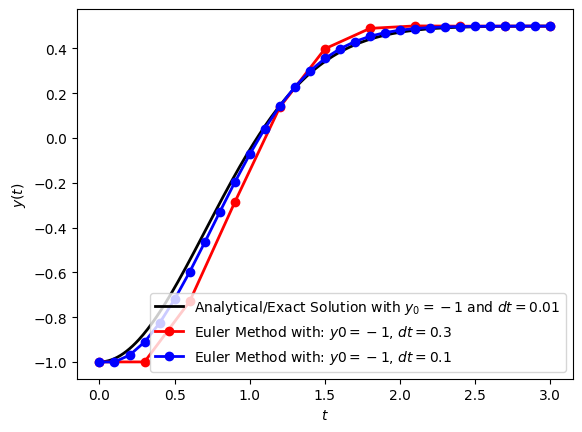

In [148]:
plot_and_compare_solutions(dt_values, t0, tn, y0_vals[0], analytical_solution, euler_method, f, colors)

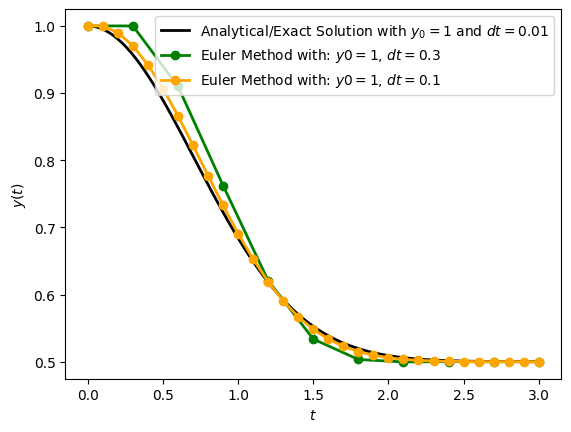

In [150]:
plot_and_compare_solutions(dt_values, t0, tn, y0_vals[1], analytical_solution, euler_method, f, colors)

In [236]:
def leaky_if(V, tau_m, E_L, I_x):
    return (1/tau_m) * (-(V - E_L) + I_x)

def leaky_if_solution(t, tau_m, V_infty, V0):
    return V_infty - (V_infty - V0) * np.exp(-t/tau_m)

# Forward Euler method implementation
def euler_method(V0, t0, tn, dt, tau_m, E_L, I_x, V_th, V_reset, ode):
    t_values = np.arange(t0, tn + dt, dt)
    V_values = np.zeros(len(t_values))
    V_values[0] = V0
    
    for i in range(1, len(t_values)):
        # V_{n+1} = V_n + dt * f(V_n)
        V_values[i] = V_values[i - 1] + dt * ode(V_values[i - 1], tau_m, E_L, I_x)
        if V_values[i] > V_th:  # Spike condition
            V_values[i] = V_reset  # Reset after spike
    
    return t_values, V_values

In [237]:
t0 = 0
tn = 2000
dt = 0.1

E_L = -70 #mV
tau_m = 10 # ms
V_th = -50 #mV
V_reset = -65 #mV
V0 = E_L

In [238]:
def plot_numerical_solution(dt, t0, tn, V0, tau_m, E_L, I_x, V_th, V_reset, numerical_method, ode, color):
    t, y = numerical_method(V0, t0, tn, dt, tau_m, E_L, I_x, V_th, V_reset, ode)
    plt.plot(t, y, '-', label=f'Euler Method with: $V_0={V0}$, $dt={dt}$', color=color, linewidth=1)
    plt.ylabel("V(t) in mV")
    plt.xlabel("t in ms")
    plt.legend()

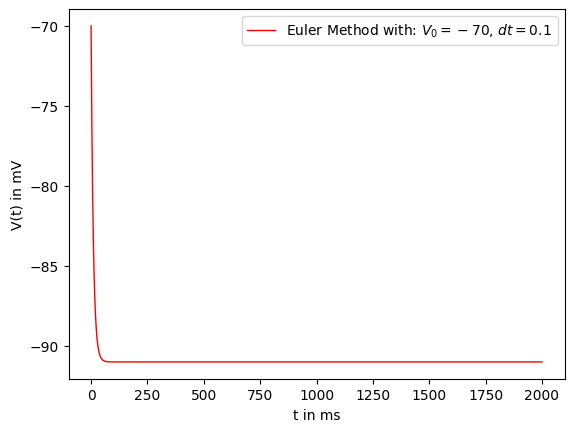

In [239]:
# Input current above V_th
I_x = 21
plot_numerical_solution(dt, t0, tn, V0, tau_m, E_L, I_x, V_th, V_reset, euler_method, leaky_if, "red")

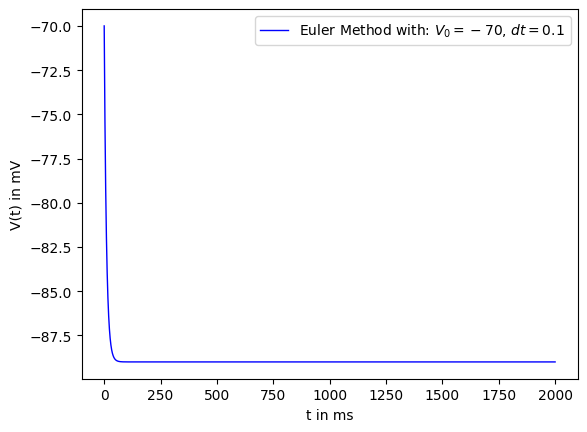

In [240]:
# Input current below V_th
I_x = 19
plot_numerical_solution(dt, t0, tn, V0, tau_m, E_L, I_x, V_th, V_reset, euler_method, leaky_if, "blue")

***
***
***

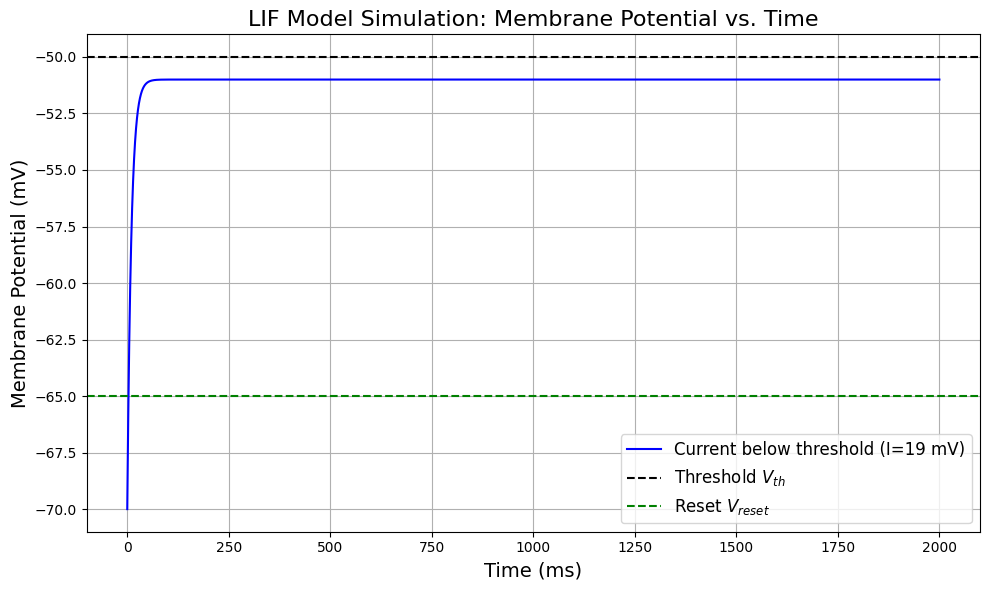

In [241]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
tau_m = 10  # ms
E_L = -70   # mV (leak potential)
V_th = -50  # mV (spike threshold)
V_reset = -65  # mV (reset potential)
dt = 0.1    # ms (time step)
t_max = 2000  # ms (maximum time)

# Define the LIF model using Euler method
def lif_model(I, t_max, dt, V_init):
    time_steps = int(t_max / dt)
    V = np.zeros(time_steps)
    V[0] = V_init
    t = np.linspace(0, t_max, time_steps)
    
    for i in range(1, time_steps):
        dVdt = (1/tau_m)*(-(V[i-1] - E_L) + I)
        V[i] = V[i-1] + dt * dVdt
        if V[i] > V_th:  # Spike condition
            V[i] = V_reset  # Reset after spike
    
    return t, V

# Input currents: one just below Ith and one just above Ith
I_below = 19 # Example of current just below threshold (adjust this based on your Ith)
I_above = 21  # Example of current just above threshold

# Initial value of membrane potential
V_init = E_L

# Simulate for both input currents
t_below, V_below = lif_model(I_below, t_max, dt, V_init)
t_above, V_above = lif_model(I_above, t_max, dt, V_init)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t_below, V_below, label=f'Current below threshold (I={I_below} mV)', color='blue')
plt.axhline(V_th, color='black', linestyle='--', label="Threshold $V_{th}$")
plt.axhline(V_reset, color='green', linestyle='--', label="Reset $V_{reset}$")
plt.title("LIF Model Simulation: Membrane Potential vs. Time", fontsize=16)
plt.xlabel("Time (ms)", fontsize=14)
plt.ylabel("Membrane Potential (mV)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


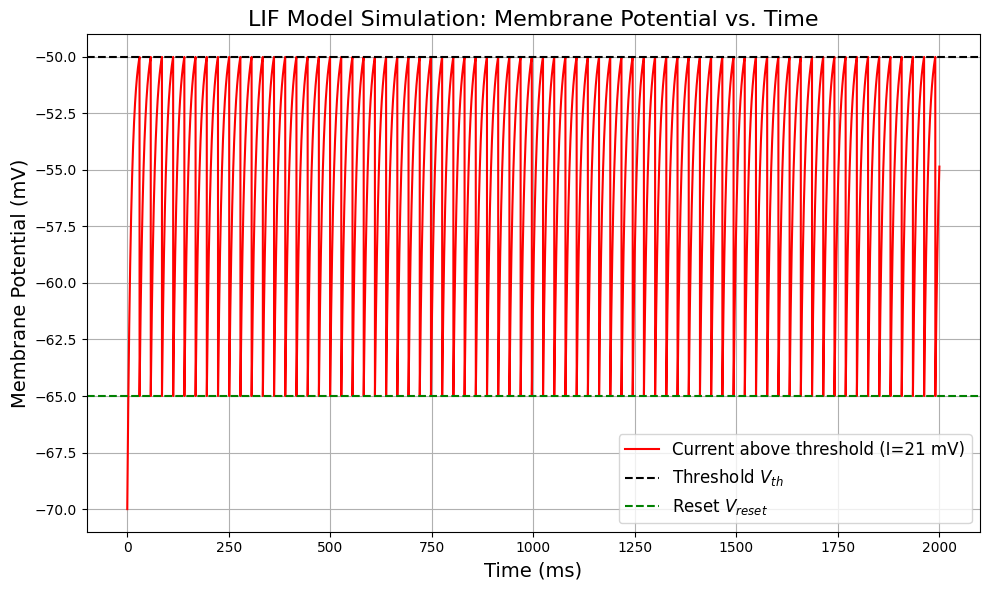

In [242]:
plt.figure(figsize=(10, 6))
plt.plot(t_above, V_above, label=f'Current above threshold (I={I_above} mV)', color='red')
plt.axhline(V_th, color='black', linestyle='--', label="Threshold $V_{th}$")
plt.axhline(V_reset, color='green', linestyle='--', label="Reset $V_{reset}$")
plt.title("LIF Model Simulation: Membrane Potential vs. Time", fontsize=16)
plt.xlabel("Time (ms)", fontsize=14)
plt.ylabel("Membrane Potential (mV)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()